In [1]:
import praw
reddit = praw.Reddit(
    client_id="gRHEFX9H4lWzqR3HTNI-xg",
    client_secret="QFt-7pifzSBA1eNkG6NLnuK7zOZJrQ",
    user_agent="Assignment1_CityU",
)

In [2]:
import pandas as pd

# Create empty lists to store data
combined_data = []

posts = reddit.subreddit('elonmusk').top(limit=None)

# Collect data from posts
for post in posts:
    post_data = {
        'Title': post.title,
        'Post ID': post.id,
        'Author': str(post.author),
        'URL': post.url,
        'Score': post.score,
        'Comment Count': post.num_comments,
        'Created': post.created_utc,
    }
    combined_data.append(post_data)

    # Collect data from comments for the current post
    for comment in post.comments.list():
        if isinstance(comment, praw.models.Comment):
            comment_data = {
                'Title': post.title,  # Use the post's title for the comment
                'Post ID': post.id,  # Use the post's ID for the comment
                'Author': str(comment.author),
                'URL': post.url,  # Use the post's URL for the comment
                'Score': comment.score,
                'Comment Count': 0,  # Comments on comments are not tracked
                'Created': comment.created_utc,
                'Comment Body': comment.body,
                'Comment Author': str(comment.author),
            }
            combined_data.append(comment_data)

# Create a DataFrame from the collected data
df = pd.DataFrame(combined_data)

In [3]:
df

,Title,Post ID,Author,URL,Score,Comment Count,Created,Comment Body,Comment Author
0,Elon Musk Leaves Presidential Councils,6epd1s,None,https://twitter.com/elonmusk/status/8703699158...,47862,2032,1.496347e+09,NaN,NaN
1,Elon Musk Leaves Presidential Councils,6epd1s,Litterball,https://twitter.com/elonmusk/status/8703699158...,9706,0,1.496348e+09,There is really no point in staying on as an a...,Litterball
2,Elon Musk Leaves Presidential Councils,6epd1s,golfprokal,https://twitter.com/elonmusk/status/8703699158...,2257,0,1.496350e+09,On watch for a stupid Trump tweet about Elon.,golfprokal
3,Elon Musk Leaves Presidential Councils,6epd1s,suredoit,https://twitter.com/elonmusk/status/8703699158...,576,0,1.496349e+09,I am surprised this isnt on /r/Futurology,suredoit
4,Elon Musk Leaves Presidential Councils,6epd1s,RiseoftheTrumpwaffen,https://twitter.com/elonmusk/status/8703699158...,496,0,1.496349e+09,I guess all that 'the only way to deal with Tr...,RiseoftheTrumpwaffen
...,...,...,...,...,...,...,...,...,...
82210,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,stout365,https://twitter.com/elonmusk/status/1707809181...,0,0,1.696017e+09,"lol all good, words are hard 🤣",stout365
82211,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,AJDx14,https://twitter.com/elonmusk/status/1707809181...,2,0,1.696103e+09,Immigration: the action of coming to live perm...,AJDx14
82212,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,PantherU,https://twitter.com/elonmusk/status/1707809181...,0,0,1.696291e+09,"Yeah, decriminalize drugs and the cartel goes ...",PantherU
82213,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,OSUfan88,https://twitter.com/elonmusk/status/1707809181...,3,0,1.696104e+09,"Personally, I think we should bet who we let i...",OSUfan88


In [4]:
df.to_csv('reddit_data.csv', index=False)

In [5]:
! pip install langdetect

In [2]:
import langdetect # Import the language detection function
import pandas as pd

# Load the existing DataFrame from a CSV file
df = pd.read_csv('reddit_data.csv')
# Create a function to detect the language of a text
def detect_language(text):
    try:
        return langdetect.detect(text)
    except:
        return 'unknown'  # Handle cases where language detection fails

# Apply the language detection function to the 'Title' and 'Comment Body' columns
df['Title Language'] = df['Title'].apply(detect_language)
df['Comment Language'] = df['Comment Body'].apply(detect_language)



In [3]:
df

,Title,Post ID,Author,URL,Score,Comment Count,Created,Comment Body,Comment Author,Title Language,Comment Language
0,Elon Musk Leaves Presidential Councils,6epd1s,NaN,https://twitter.com/elonmusk/status/8703699158...,47862,2032,1.496347e+09,NaN,NaN,en,unknown
1,Elon Musk Leaves Presidential Councils,6epd1s,Litterball,https://twitter.com/elonmusk/status/8703699158...,9706,0,1.496348e+09,There is really no point in staying on as an a...,Litterball,en,en
2,Elon Musk Leaves Presidential Councils,6epd1s,golfprokal,https://twitter.com/elonmusk/status/8703699158...,2257,0,1.496350e+09,On watch for a stupid Trump tweet about Elon.,golfprokal,ca,en
3,Elon Musk Leaves Presidential Councils,6epd1s,suredoit,https://twitter.com/elonmusk/status/8703699158...,576,0,1.496349e+09,I am surprised this isnt on /r/Futurology,suredoit,en,en
4,Elon Musk Leaves Presidential Councils,6epd1s,RiseoftheTrumpwaffen,https://twitter.com/elonmusk/status/8703699158...,496,0,1.496349e+09,I guess all that 'the only way to deal with Tr...,RiseoftheTrumpwaffen,en,en
...,...,...,...,...,...,...,...,...,...,...,...
82210,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,stout365,https://twitter.com/elonmusk/status/1707809181...,0,0,1.696017e+09,"lol all good, words are hard 🤣",stout365,en,en
82211,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,AJDx14,https://twitter.com/elonmusk/status/1707809181...,2,0,1.696103e+09,Immigration: the action of coming to live perm...,AJDx14,en,en
82212,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,PantherU,https://twitter.com/elonmusk/status/1707809181...,0,0,1.696291e+09,"Yeah, decriminalize drugs and the cartel goes ...",PantherU,en,en
82213,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,OSUfan88,https://twitter.com/elonmusk/status/1707809181...,3,0,1.696104e+09,"Personally, I think we should bet who we let i...",OSUfan88,en,en


In [5]:
df['Title Language'].value_counts()

Title Language
en         61742
de          1762
unknown     1372
cy          1340
et          1336
nl          1329
id          1281
es          1187
tl          1075
fr          1042
af          1033
ca          1001
da           887
fi           806
sv           751
so           705
no           538
pt           454
vi           424
it           424
ro           328
sk           307
hu           283
sl           160
sq           141
sw           133
pl           131
hr           126
tr            68
cs            49
Name: count, dtype: int64

In [6]:
df['Comment Language'].value_counts()

Comment Language
en         67367
da          2740
unknown     1803
sl           980
ro           746
af           731
de           710
fr           678
so           668
cy           547
nl           538
tl           445
no           390
et           376
it           376
es           362
id           344
tr           281
ca           280
fi           248
pt           245
sv           203
hr           197
sw           192
pl           187
vi           176
sq            87
sk            70
cs            63
lt            58
hu            55
lv            29
ru            22
uk             5
bg             5
he             4
ja             3
ar             1
hi             1
kn             1
mk             1
Name: count, dtype: int64

In [21]:
df['Comment Language'].value_counts().head(10)

Comment Language
en         67367
da          2740
unknown     1803
sl           980
ro           746
af           731
de           710
fr           678
so           668
cy           547
Name: count, dtype: int64

<Axes: xlabel='Comment Language'>

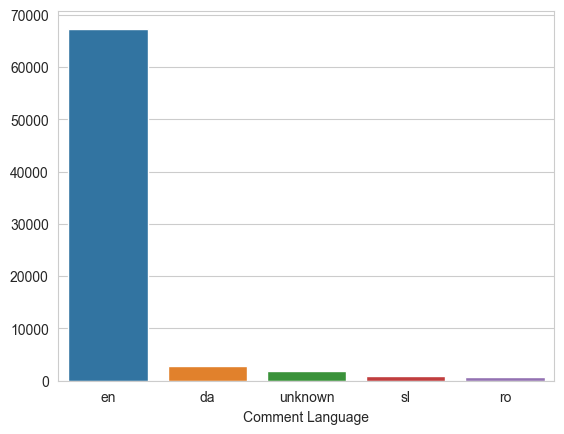

In [24]:
import seaborn as sns
sns.barplot(y=df['Comment Language'].value_counts().head(10).values, x=df['Comment Language'].value_counts().head(10).index )


<Axes: xlabel='Title Language'>

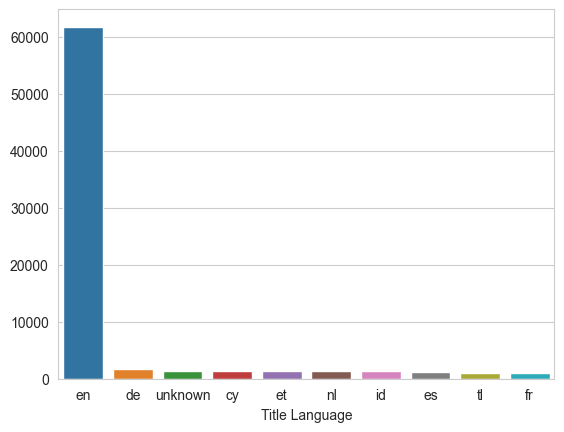

In [34]:
sns.barplot(y=df['Title Language'].value_counts().head(10).values, x=df['Title Language'].value_counts().head(10).index )


In [10]:
df[df['Comment Language']=='unknown']

,Title,Post ID,Author,URL,Score,Comment Count,Created,Comment Body,Comment Author,Title Language,Comment Language
0,Elon Musk Leaves Presidential Councils,6epd1s,NaN,https://twitter.com/elonmusk/status/8703699158...,47862,2032,1.496347e+09,NaN,NaN,en,unknown
293,Elon Musk Leaves Presidential Councils,6epd1s,mdgraller,https://twitter.com/elonmusk/status/8703699158...,169,0,1.496359e+09,http://imgur.com/a/wuAxH,mdgraller,es,unknown
487,Elon Musk's 18 year transformation after found...,6xz0md,abhangu,https://i.redd.it/s0fvyktmmtjz.jpg,16777,595,1.504512e+09,NaN,NaN,en,unknown
653,Elon Musk's 18 year transformation after found...,6xz0md,mspk7305,https://i.redd.it/s0fvyktmmtjz.jpg,2,0,1.504550e+09,http://i.imgur.com/MeAZhTt.png,mspk7305,en,unknown
656,Elon Musk's 18 year transformation after found...,6xz0md,puetzk,https://i.redd.it/s0fvyktmmtjz.jpg,1,0,1.507418e+09,http://www.collegehumor.com/video/6902998/bald...,puetzk,en,unknown
...,...,...,...,...,...,...,...,...,...,...,...
81826,I love this description of Elon.,l94cmx,Alex55936,https://i.redd.it/0bor7rvtgle61.jpg,1486,70,1.612067e+09,NaN,NaN,en,unknown
81864,X Æ A-12. What a legend,gdz87i,sAdB0i69,https://i.redd.it/6daq7g27nyw41.png,1485,64,1.588691e+09,NaN,NaN,hu,unknown
81928,Opinionated politician opens her mouth and get...,u4dltu,TheWoodchuck,https://i.redd.it/atra15lxcqt81.png,1480,101,1.650045e+09,NaN,NaN,en,unknown
82014,X rolls out new ad format that can't be report...,171ixdw,Mront,https://mashable.com/article/twitter-x-new-cli...,1436,212,1.696615e+09,NaN,NaN,en,unknown


In [32]:
df[df['Title Language']=='unknown']['Title'].values

array([':)', ':)', ':)', ..., '🤣', '🤣', '🤣'], dtype=object)

In [11]:
df[df['Title Language']=='unknown']

,Title,Post ID,Author,URL,Score,Comment Count,Created,Comment Body,Comment Author,Title Language,Comment Language
16267,:),hiikrs,VitoOnTheWay,https://i.redd.it/aq2lovff20851.png,3736,76,1.593502e+09,NaN,NaN,unknown,unknown
16268,:),hiikrs,Some_Belgian_Guy,https://i.redd.it/aq2lovff20851.png,71,0,1.593509e+09,I wax my rocket every day,Some_Belgian_Guy,unknown,en
16269,:),hiikrs,StefaniaCarpano,https://i.redd.it/aq2lovff20851.png,36,0,1.593511e+09,"Ladies, get a man who can fly his rockets...",StefaniaCarpano,unknown,en
16270,:),hiikrs,NaN,https://i.redd.it/aq2lovff20851.png,12,0,1.593511e+09,I look at a rocket everyday🐕,NaN,unknown,en
16271,:),hiikrs,GenKaYY,https://i.redd.it/aq2lovff20851.png,22,0,1.593511e+09,I love this subreddit and appreciate the posts...,GenKaYY,unknown,en
...,...,...,...,...,...,...,...,...,...,...,...
81126,🤣,w6hu6v,TheresBeesMC,https://i.redd.it/5pjiumq0ped91.jpg,3,0,1.658659e+09,Bruh South Africa is a country 🇿🇦,TheresBeesMC,unknown,en
81127,🤣,w6hu6v,Mr-Happy9,https://i.redd.it/5pjiumq0ped91.jpg,2,0,1.658700e+09,🗿,Mr-Happy9,unknown,unknown
81128,🤣,w6hu6v,Degloved_Hand,https://i.redd.it/5pjiumq0ped91.jpg,2,0,1.658644e+09,Sure,Degloved_Hand,unknown,af
81129,🤣,w6hu6v,Hullababoob,https://i.redd.it/5pjiumq0ped91.jpg,4,0,1.658646e+09,Hmm. Yes. New Zealand is in Australia. Mm-hmm.,Hullababoob,unknown,en


In [8]:
# Filter only English posts and comments
english_df = df[(df['Title Language'] == 'en') & (df['Comment Language'] == 'en')]
english_df.shape

(50999, 11)

In [ ]:

# Filter only English posts and comments
english_df = df[(df['Title Language'] == 'en') & (df['Comment Language'] == 'en')]

# Drop the language detection columns
english_df.drop(['Title Language', 'Comment Language'], axis=1, inplace=True)

# Save the DataFrame with English posts and comments to a new CSV file
english_df.to_csv('english_reddit_data.csv', index=False)

In [29]:
import pandas as pd
# Load the DataFrame with English posts and comments
english_df = pd.read_csv('english_reddit_data.csv')

# Convert the 'Created' column to a datetime format
english_df['Created'] = pd.to_datetime(english_df['Created'], unit='s')
english_df['Created'] = pd.to_datetime(english_df['Created'], format='%Y-%m-%d %H:%M:%S')

In [30]:
english_df

,Title,Post ID,Author,URL,Score,Comment Count,Created,Comment Body,Comment Author
0,Elon Musk Leaves Presidential Councils,6epd1s,Litterball,https://twitter.com/elonmusk/status/8703699158...,9706,0,2017-06-01 20:21:23,There is really no point in staying on as an a...,Litterball
1,Elon Musk Leaves Presidential Councils,6epd1s,RiseoftheTrumpwaffen,https://twitter.com/elonmusk/status/8703699158...,496,0,2017-06-01 20:31:45,I guess all that 'the only way to deal with Tr...,RiseoftheTrumpwaffen
2,Elon Musk Leaves Presidential Councils,6epd1s,mirrorsaw,https://twitter.com/elonmusk/status/8703699158...,913,0,2017-06-01 20:10:56,Was there any doubt this man would stick to hi...,mirrorsaw
3,Elon Musk Leaves Presidential Councils,6epd1s,ShanghaiBebop,https://twitter.com/elonmusk/status/8703699158...,105,0,2017-06-01 20:20:45,I wonder how much trump actually takes as advi...,ShanghaiBebop
4,Elon Musk Leaves Presidential Councils,6epd1s,jonb3838,https://twitter.com/elonmusk/status/8703699158...,35,0,2017-06-01 23:52:08,Every President wants to leave a stamp on Amer...,jonb3838
...,...,...,...,...,...,...,...,...,...
51055,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,stout365,https://twitter.com/elonmusk/status/1707809181...,0,0,2023-09-29 19:53:36,"lol all good, words are hard 🤣",stout365
51056,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,AJDx14,https://twitter.com/elonmusk/status/1707809181...,2,0,2023-09-30 19:50:24,Immigration: the action of coming to live perm...,AJDx14
51057,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,PantherU,https://twitter.com/elonmusk/status/1707809181...,0,0,2023-10-02 23:51:04,"Yeah, decriminalize drugs and the cartel goes ...",PantherU
51058,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,OSUfan88,https://twitter.com/elonmusk/status/1707809181...,3,0,2023-09-30 19:54:00,"Personally, I think we should bet who we let i...",OSUfan88


In [31]:
english_df.describe()

,Score,Comment Count,Created
count,51060.000000,51060.0,51060
mean,9.689268,0.0,2020-12-07 15:41:56.412396800
min,-205.000000,0.0,2016-11-09 19:30:56
25%,1.000000,0.0,2020-01-03 17:08:40.249999872
50%,2.000000,0.0,2020-08-17 23:35:36
75%,6.000000,0.0,2021-11-08 22:09:19
max,9706.000000,0.0,2023-10-10 06:13:57
std,57.484364,0.0,NaN


In [34]:
english_df['Title'].isnull().sum()

0

In [35]:
english_df['Comment Body'].isnull().sum()

0

In [43]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

english_df['Comment Body'] = english_df['Comment Body'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/jesse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jesse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
english_df

,Title,Post ID,Author,URL,Score,Comment Count,Created,Comment Body,Comment Author
0,Elon Musk Leaves Presidential Councils,6epd1s,Litterball,https://twitter.com/elonmusk/status/8703699158...,9706,0,2017-06-01 20:21:23,realli point stay advisor person take advic,Litterball
1,Elon Musk Leaves Presidential Councils,6epd1s,RiseoftheTrumpwaffen,https://twitter.com/elonmusk/status/8703699158...,496,0,2017-06-01 20:31:45,guess way deal trump work pan,RiseoftheTrumpwaffen
2,Elon Musk Leaves Presidential Councils,6epd1s,mirrorsaw,https://twitter.com/elonmusk/status/8703699158...,913,0,2017-06-01 20:10:56,doubt man would stick word dude wrong,mirrorsaw
3,Elon Musk Leaves Presidential Councils,6epd1s,ShanghaiBebop,https://twitter.com/elonmusk/status/8703699158...,105,0,2017-06-01 20:20:45,wonder much trump actual take advic presidenti...,ShanghaiBebop
4,Elon Musk Leaves Presidential Councils,6epd1s,jonb3838,https://twitter.com/elonmusk/status/8703699158...,35,0,2017-06-01 23:52:08,everi presid want leav stamp america unfortun ...,jonb3838
...,...,...,...,...,...,...,...,...,...
51055,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,stout365,https://twitter.com/elonmusk/status/1707809181...,0,0,2023-09-29 19:53:36,lol good word hard,stout365
51056,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,AJDx14,https://twitter.com/elonmusk/status/1707809181...,2,0,2023-09-30 19:50:24,immigr action come live perman foreign countri...,AJDx14
51057,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,PantherU,https://twitter.com/elonmusk/status/1707809181...,0,0,2023-10-02 23:51:04,yeah decrimin drug cartel goe legit,PantherU
51058,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,OSUfan88,https://twitter.com/elonmusk/status/1707809181...,3,0,2023-09-30 19:54:00,person think bet let far peopl would like come...,OSUfan88


In [45]:
# Create a new 'Date' column with the desired format '%Y-%m-%d'
english_df['Date'] = english_df['Created'].dt.strftime('%Y-%m-%d')

In [46]:
# Extract the minimum and maximum dates
min_date = english_df['Date'].min()
max_date = english_df['Date'].max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2016-11-09
Maximum Date: 2023-10-10


In [11]:
from alpha_vantage.timeseries import TimeSeries

# Replace 'YOUR_API_KEY' with your AlphaVantage API key
api_key = 'J2OJF6SPJGM94TKD'

# Create an instance of the TimeSeries class
ts = TimeSeries(key=api_key, output_format='pandas')

symbol = 'TSLA'  # Tesla stock symbol


# Retrieve historical stock price data from AlphaVantage
stock_data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

# Convert the date index to a 'Date' column in the DataFrame
stock_data.reset_index(inplace=True)
stock_data.to_csv('stock_data.csv', index=False)

In [47]:
# Load your AlphaVantage DataFrame
alpha_df = pd.read_csv('stock_data.csv')

# Convert the 'Date' column in the AlphaVantage DataFrame to datetime
alpha_df['date'] = pd.to_datetime(alpha_df['date'], format='%Y-%m-%d')
alpha_df['date'] = alpha_df['date'].dt.strftime('%Y-%m-%d')

# Slice the 'alpha_df' DataFrame to select rows within the date range in reddit data
alpha_sliced_df = alpha_df.loc[(alpha_df['date'] >= min_date) & (alpha_df['date'] <= max_date)]

# Reset the index if needed
alpha_sliced_df.reset_index(drop=True, inplace=True)

alpha_sliced_df = alpha_sliced_df.rename(columns={'date': 'Date'})


In [48]:
alpha_sliced_df

,Date,1. open,2. high,3. low,4. close,5. volume
0,2023-10-09,255.310,261.36,252.05,259.67,101377947.0
1,2023-10-06,253.980,261.65,250.65,260.53,118121812.0
2,2023-10-05,260.000,263.60,256.25,260.05,119159214.0
3,2023-10-04,248.140,261.86,247.60,261.16,129721567.0
4,2023-10-03,248.610,250.02,244.45,246.53,101985305.0
...,...,...,...,...,...,...
1734,2016-11-15,182.780,186.43,182.05,183.77,3902018.0
1735,2016-11-14,188.000,188.25,178.19,181.45,6552205.0
1736,2016-11-11,184.240,188.88,183.00,188.56,3988504.0
1737,2016-11-10,191.050,191.61,180.42,185.35,6750341.0


In [49]:
# Merge the DataFrames based on the 'Date' column
merged_df = pd.merge(english_df,alpha_sliced_df, on='Date', how='inner')
# Save the merged data to a CSV file or perform further analysis
merged_df.to_csv('merged_data.csv', index=False)

In [50]:
merged_df

,Title,Post ID,Author,URL,Score,Comment Count,Created,Comment Body,Comment Author,Date,1. open,2. high,3. low,4. close,5. volume
0,Elon Musk Leaves Presidential Councils,6epd1s,Litterball,https://twitter.com/elonmusk/status/8703699158...,9706,0,2017-06-01 20:21:23,realli point stay advisor person take advic,Litterball,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
1,Elon Musk Leaves Presidential Councils,6epd1s,RiseoftheTrumpwaffen,https://twitter.com/elonmusk/status/8703699158...,496,0,2017-06-01 20:31:45,guess way deal trump work pan,RiseoftheTrumpwaffen,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
2,Elon Musk Leaves Presidential Councils,6epd1s,mirrorsaw,https://twitter.com/elonmusk/status/8703699158...,913,0,2017-06-01 20:10:56,doubt man would stick word dude wrong,mirrorsaw,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
3,Elon Musk Leaves Presidential Councils,6epd1s,ShanghaiBebop,https://twitter.com/elonmusk/status/8703699158...,105,0,2017-06-01 20:20:45,wonder much trump actual take advic presidenti...,ShanghaiBebop,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
4,Elon Musk Leaves Presidential Councils,6epd1s,jonb3838,https://twitter.com/elonmusk/status/8703699158...,35,0,2017-06-01 23:52:08,everi presid want leav stamp america unfortun ...,jonb3838,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36856,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,AlienWarehouseParty,https://twitter.com/elonmusk/status/1707809181...,23,0,2023-09-29 19:49:18,awar need either skill high net worth anoth co...,AlienWarehouseParty,2023-09-29,250.0,254.77,246.35,250.22,128522729.0
36857,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,ClickF0rDick,https://twitter.com/elonmusk/status/1707809181...,1,0,2023-09-29 23:11:50,cri italian,ClickF0rDick,2023-09-29,250.0,254.77,246.35,250.22,128522729.0
36858,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,stout365,https://twitter.com/elonmusk/status/1707809181...,-3,0,2023-09-29 19:51:51,wait initi comment made think say countri lax ...,stout365,2023-09-29,250.0,254.77,246.35,250.22,128522729.0
36859,"Elon: ""Illegal immigration needs to stop, but ...",16vj5q0,AlienWarehouseParty,https://twitter.com/elonmusk/status/1707809181...,6,0,2023-09-29 19:52:50,bad edit clear,AlienWarehouseParty,2023-09-29,250.0,254.77,246.35,250.22,128522729.0
